In [1]:
import numpy as np 
import pandas as pd
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
output_notebook()

Loading BokehJS ...

In [2]:
path_csv = "C:\\Users\\krish\\Desktop\\New folder (3)\\imports-85.data"

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
with open("C:\\Users\\krish\\Desktop\\New folder (3)\\imports-85.data") as data_read:
    read_line=csv.reader(data_read)
    lines=list(read_line)
    
    

In [5]:
def mean(a):
    t=headers.index(a)
    sum=0
    total=0
    for i in lines:
        temp=i[t]
        if temp != "?":
            sum=sum+float(temp)
            total=total+1
    return sum/total

In [6]:
def maximum(a):
    t=headers.index(a)
    temp=[]
    for i in lines:
        temp += [i[t]]
       
            
    return max(temp)

In [7]:
def remove(a):
    t=headers.index(a)
    index=[]
    for i in lines:
        temp=i[t]
        if temp == "?":
            index.append(i)
    for x in index:
        lines.remove(x)

In [8]:
def replace(a,mean):
    t=headers.index(a)
    
    for i in lines:
        temp=i[t]
        if temp == "?":
            i[t]=mean
    

In [9]:
mean_normalized_losses = int(mean("normalized-losses"))
mean_stroke = mean("stroke")
mean_bore = mean("bore")
mean_horsepower = int(mean("horsepower"))
mean_peak_rpm = mean("peak-rpm")
frequency_num_of_doors = maximum("num-of-doors")

replace("normalized-losses",mean_normalized_losses)
replace("stroke",mean_stroke)
replace("bore",mean_bore)
replace("horsepower",mean_horsepower)
replace("peak-rpm",mean_peak_rpm)
replace("num-of-doors",frequency_num_of_doors)
remove("price")
print("Length of new data",len(lines)) #after deletion of ? prices

Length of new data 201


In [10]:
def find(x):
    new_x =[]
    t=headers.index(x)
    for k in lines: 
        new_x += [k[t]]
        
    return new_x 

In [11]:
def findi(x):
    new_x =[]
    t=headers.index(x)
    for k in lines: 
        new_x += [int(k[t])]
        
    return new_x 

In [12]:
def findf(x):
    new_x =[]
    t=headers.index(x)
    for k in lines: 
        new_x += [float(k[t])]
        
    return new_x 

In [13]:
stroke = findf("stroke")
price = findf("price")

In [14]:
training_x = np.array(stroke).reshape(-1, 1)
training_y = np.array(price)
model = linear_model.LinearRegression()
# perform linear fit/regression
model.fit(training_x, training_y)
# turn coefficient array which contains only one number into a number
slope = np.asscalar(np.squeeze(model.coef_))
intercept = model.intercept_
print('slope: ', slope, 'intercept: ', intercept)

slope:  2068.6739920082555 intercept:  6469.718633642275


In [15]:
from bokeh.models import Slope
source = ColumnDataSource(data=dict(
    x=stroke,
    y=price,
    
))

# add tooltips to show infos for each datapoint
tooltips = [
    
    ('Stroke', '$x'),
    ('price', '$y{$0}')
]

# create figure
p = figure(plot_width=600, plot_height=400, tooltips=tooltips)
# add axis labels
p.xaxis.axis_label = 'stroke'
p.yaxis.axis_label = 'Price'

# show datapoints as circles
p.circle('x', 'y', source=source, size=8, color='blue', alpha=0.5)




best_fit = Slope(gradient=slope, y_intercept=intercept, line_color='red', line_width=3)
p.add_layout(best_fit)
show(p)


In [16]:
#creating a data frame for pandas
df = pd.DataFrame(list(zip(findi("symboling"),findi("normalized-losses"),find("make"),find("fuel-type"),find("aspiration"),find("num-of-doors"),find("body-style"),
         find("drive-wheels"),find("engine-location"),findf("wheel-base"),findf("length"),findf("width"),findf("height"),findi("curb-weight"),find("engine-type"),
       find("num-of-cylinders"), findi("engine-size"),find("fuel-system"),findf("bore"),findf("stroke"),findf("compression-ratio"),findi("horsepower"),
         findf("peak-rpm"),findi("city-mpg"),findi("highway-mpg"),findi("price"))), 
               columns =headers)

In [17]:
df.dtypes


symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

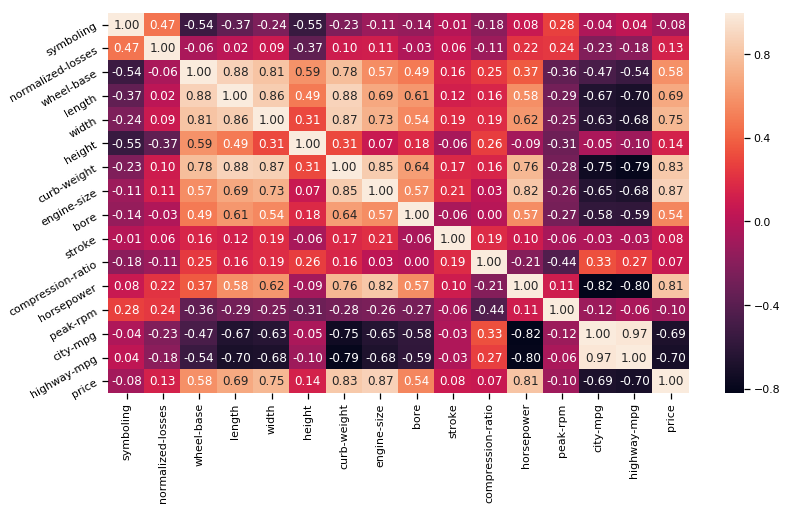

In [18]:
#correlation heat map
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

–1. A perfect downhill (negative) linear relationship

–0.70. A strong downhill (negative) linear relationship

–0.50. A moderate downhill (negative) relationship

–0.30. A weak downhill (negative) linear relationship

0. No linear relationship

+0.30. A weak uphill (positive) linear relationship

+0.50. A moderate uphill (positive) relationship

+0.70. A strong uphill (positive) linear relationship

+1. A perfect uphill (positive) linear relationship

# BOX PLOT OF

    -body-style
    -engine-location
    -drive-wheels

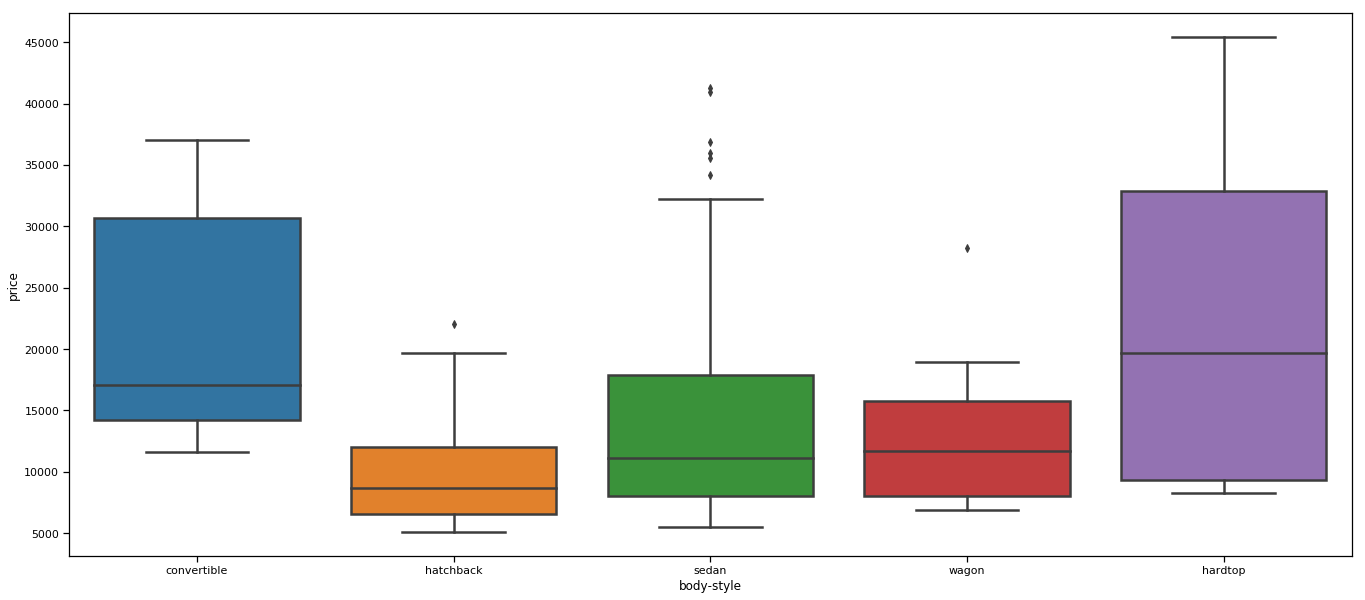

In [19]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="body-style", y="price", data=df)

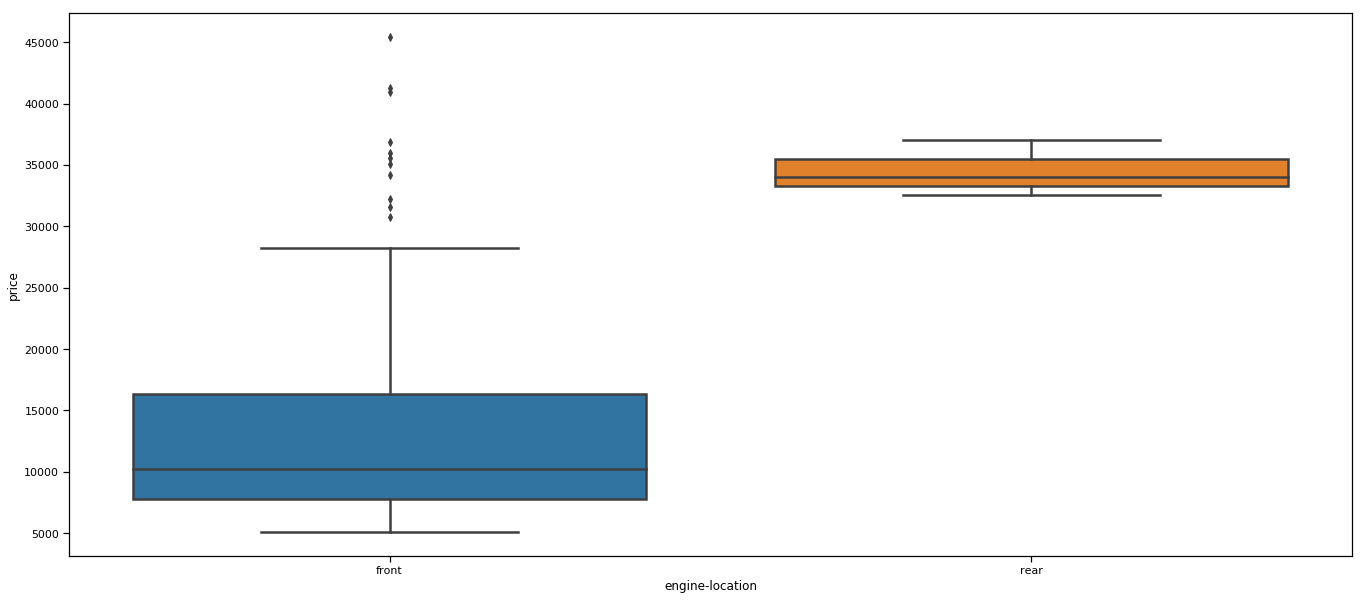

In [20]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="engine-location", y="price", data=df)

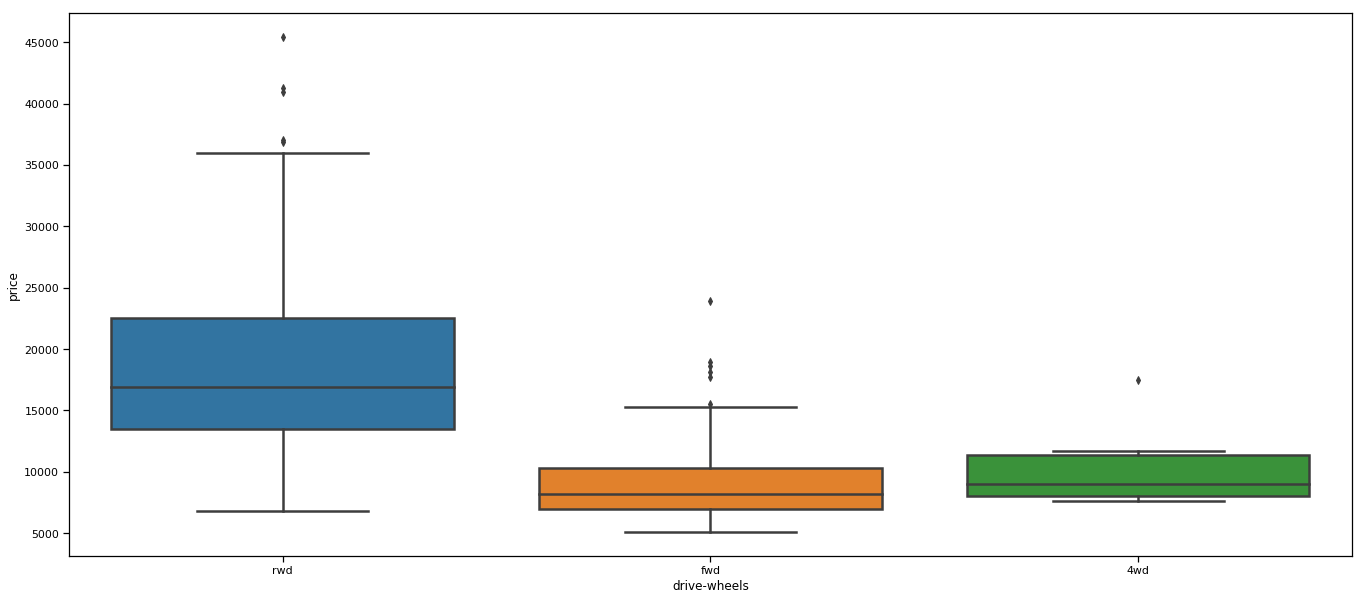

In [21]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

In [23]:
X=df[["highway-mpg","engine-size","horsepower","curb-weight"]]#all independent variable's are float
Y=df['price']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X) 
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -15811.863767729275
Coefficients: 
 [36.1593925  81.51280006 53.53022809  4.70805253]


In [24]:
compare=pd.DataFrame(list(zip(Y,Y_pred)),columns=["Y orginal","Y predicted"])
print(compare)

     Y orginal   Y predicted
0        13495  13699.077005
1        16500  13699.077005
2        16500  19052.713467
3        13950  10620.615244
4        17450  15520.900253
5        15250  13869.274638
6        17710  15455.888341
7        18920  15973.774120
8        23875  17612.782933
9        16430  10722.479870
10       16925  10722.479870
11       20970  17804.678390
12       21105  18063.621279
13       24565  19320.478336
14       30760  26969.329267
15       41315  27675.537147
16       36880  28191.724928
17        5151    651.897953
18        6295   5649.148525
19        6575   5813.930363
20        5572   5479.185389
21        6377   5370.707211
22        7957   8739.991464
23        6229   5799.139991
24        6692   5902.717147
25        7609   5902.717147
26        8558   9036.598774
27        8921  11863.052853
28       12964  18768.177199
29        6479   4809.568248
..         ...           ...
171       9988  11579.818194
172      10898  11579.818194
173      11248

In [25]:
#Dummy check
regr.predict([[13.2,3.6,88.9,98.0]])


array([-9820.88728157])

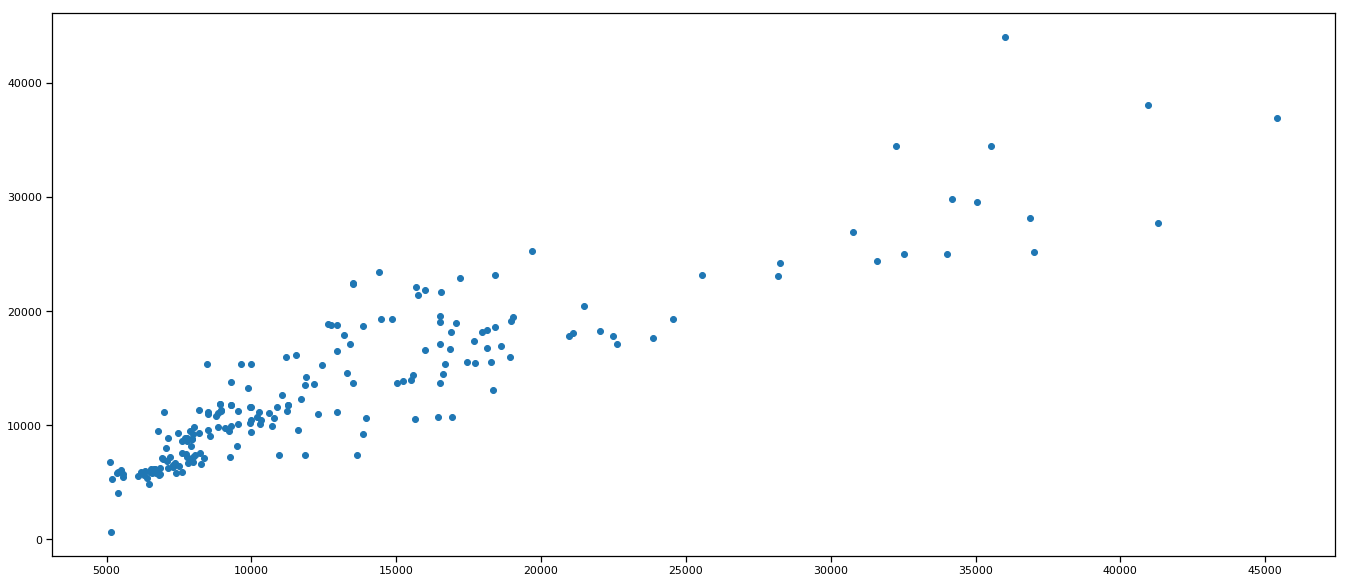

In [38]:
plt.scatter(Y, Y_pred)
#plt.plot(Y, Y_pred, color='red')
plt.show()

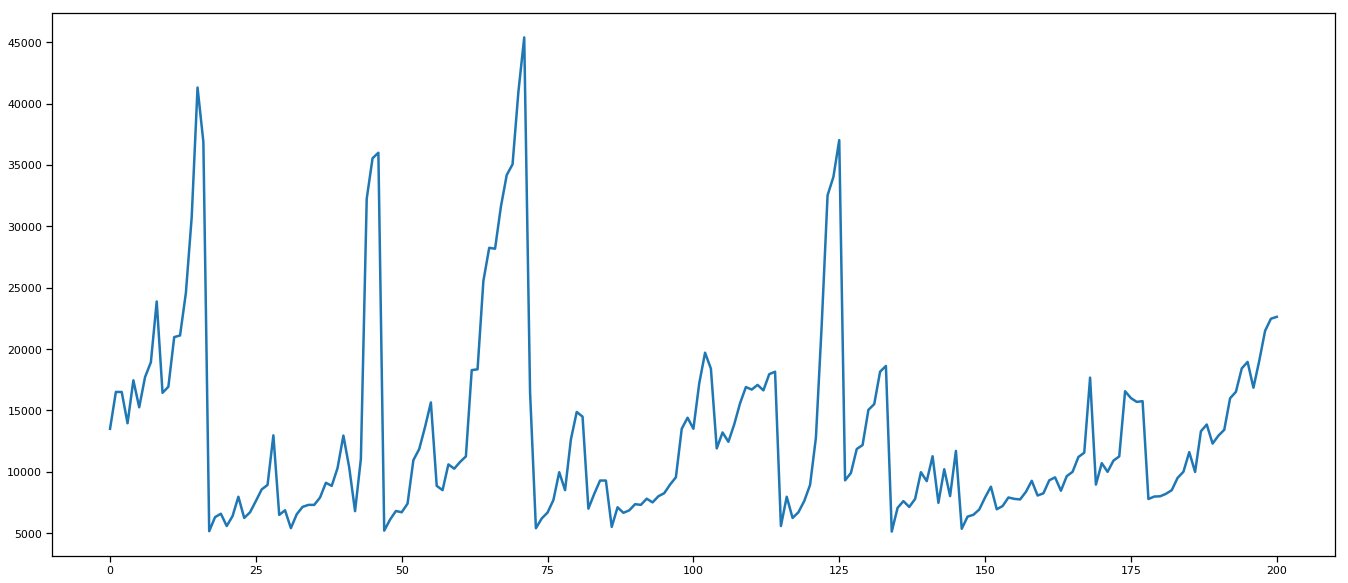

In [28]:
plt.plot(Y)

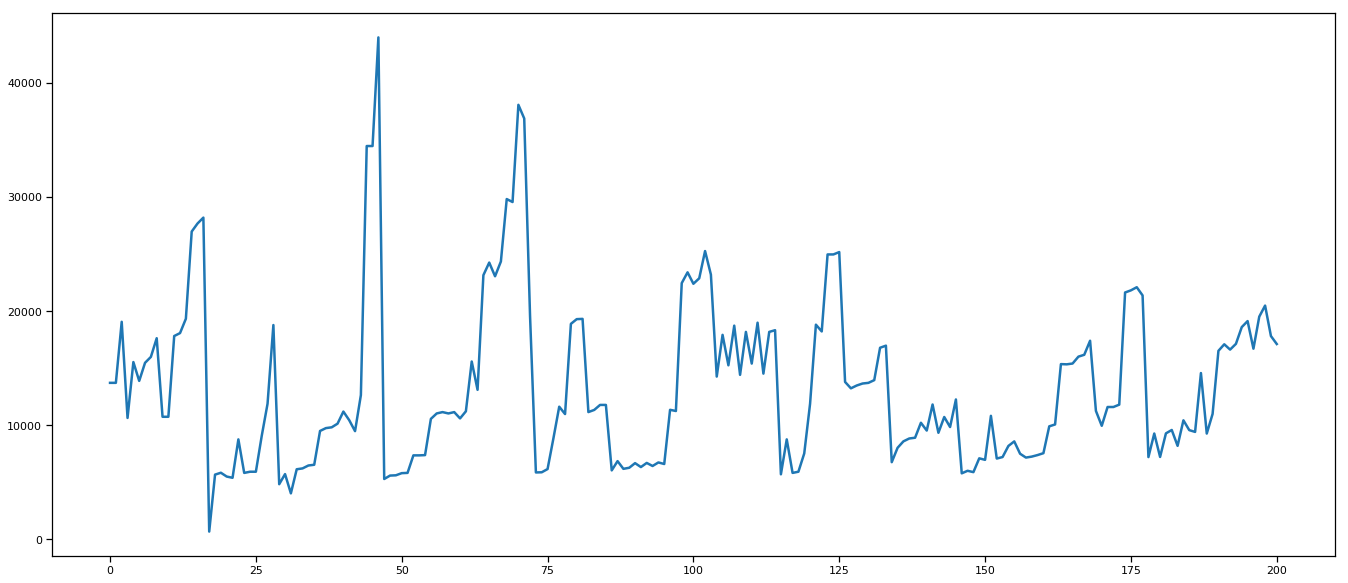

In [29]:
plt.plot(Y_pred)

In [37]:
#Find R^2
#find mean_squared_error

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error 
print("R^2",r2_score(Y, Y_pred))
print("mean_squared_error",mean_squared_error(Y, Y_pred))

R^2 0.8093732522175299
mean_squared_error 11979300.34981888
